In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [86]:
url = "./data/GlobalLandTemperaturesByCountry.csv"
data = pd.read_csv(url)
cleaned_data = data.dropna(subset=["AverageTemperature", "Country", "dt"])

In [87]:
data_spain = cleaned_data[cleaned_data["Country"] == "Spain"][["dt", "AverageTemperature"]]
data_italy = cleaned_data[cleaned_data["Country"] == "Italy"][["dt", "AverageTemperature"]]

data_spain = data_spain.rename(columns={"AverageTemperature": "AverageTemperature_Spain"})
data_italy = data_italy.rename(columns={"AverageTemperature": "AverageTemperature_Italy"})

# Merge the dataframes to have data for the same dates
merged_data = pd.merge(data_spain, data_italy, on="dt", how="inner")

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [89]:
X = np.array(merged_data['AverageTemperature_Italy']).reshape(-1, 1) 
y = np.array(merged_data['AverageTemperature_Spain']).reshape(-1, 1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

regr = LinearRegression() 

regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test)) 


0.9693052259306556


We can see that there is a strong correlation between the temperature in Spain and the temperature in Italy.
Let's see if we can predict what the temperature in Spain is going to be if we know the temperature in Italy.

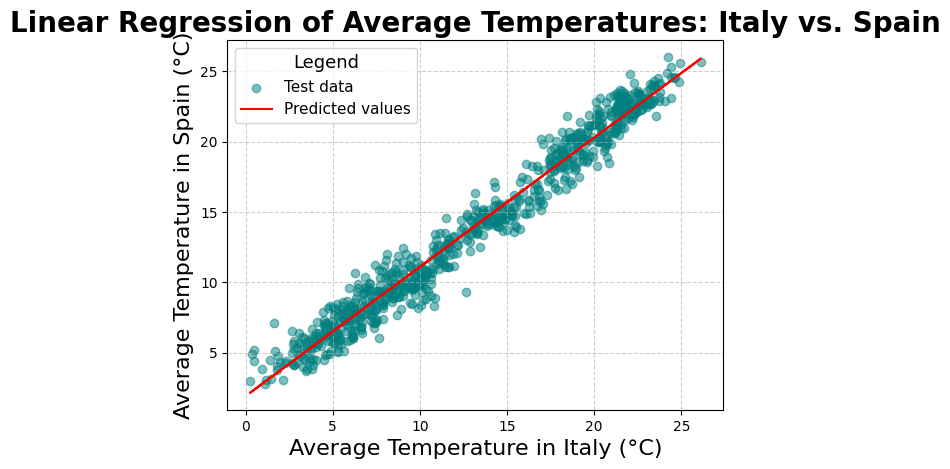

In [90]:
y_pred = regr.predict(X_test) 
plt.scatter(X_test, y_test, color ='teal', marker='o', alpha=0.5, label="Test data") 
plt.plot(X_test, y_pred, color ='red', label="Predicted values") 

plt.title("Linear Regression of Average Temperatures: Italy vs. Spain", fontsize=20, weight='bold')
plt.xlabel("Average Temperature in Italy (°C)", fontsize=16)
plt.ylabel("Average Temperature in Spain (°C)", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
# Customize the legend
plt.legend(title="Legend", title_fontsize='13', fontsize='11', loc='upper left')

plt.show() 
# Data scatter of predicted values 
